In [2]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind, pearsonr
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

In [3]:
data = pd.read_csv("../Dataset/Bianchi2011/data.csv", index_col=0, skiprows=1)

In [4]:
# Remove breast problems
data = data[41:]

In [5]:
data

,CLASS,BDO/TUMOR MATCH,SET,GENDER,AGE,TYPE,STAGE,NODE TYPE,SMOKING STATUS,PACK_YEARS,...,hsa-miR-331-4373046.1,hsa-miR-342-4373040.1,hsa-miR-374-4373028.1,hsa-miR-376a-4373026.1,hsa-miR-432-4378076.1,hsa-miR-484-4381032.1,hsa-miR-486-4378096.1,hsa-miR-566-4380943.1,hsa-miR-92-4373013.1,hsa-miR-98-4373009.1
ID,,,,,,,,,,,,,,,,,,,,,
42,Lung Hamartoma,NaN,SYMPTOMATICS - PH,M,32,NaN,NaN,NaN,NO,0,...,0.00,-2.33,-0.62,0.72,1.30,0.26,0.83,1.55,0.21,0.95
43,Lung Hamartoma,NaN,SYMPTOMATICS - PH,M,64,NaN,NaN,NaN,EX,53,...,-1.41,0.92,-0.61,-0.07,1.33,0.45,0.60,1.47,0.03,0.79
44,Lung Hamartoma,NaN,SYMPTOMATICS - PH,F,44,NaN,NaN,NaN,NO,0,...,-0.47,1.90,0.47,-0.18,-0.55,1.03,2.23,1.67,0.88,-0.13
45,Lung Hamartoma,NaN,SYMPTOMATICS - PH,F,56,NaN,NaN,NaN,YES,25,...,-0.97,-0.96,0.23,-0.24,0.62,2.57,2.19,0.00,0.54,0.90
46,Lung Hamartoma,NaN,SYMPTOMATICS - PH,M,55,NaN,NaN,NaN,EX,30,...,2.17,-0.20,1.53,0.94,-1.38,-0.32,-0.74,0.00,-0.20,-0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Lung Tumor,NaN,TESTING,F,61,ADENO,IA,NaN,YES,47,...,0.00,0.78,-0.09,-0.86,0.68,1.15,1.25,0.74,0.43,0.52
250,Lung Tumor,NaN,TESTING,M,64,ADENO,IIB,NaN,YES,49,...,-0.55,1.10,-0.32,1.12,1.48,0.18,-0.31,1.69,0.08,0.26
251,Lung Tumor,NaN,TESTING,M,73,ADENO,IA,NaN,YES,54,...,0.84,0.08,0.53,1.12,1.18,-0.88,-1.34,1.69,-0.91,0.90


In [6]:
sick = data["CLASS"] == "Lung Tumor"
table = data.iloc[:, 11:]
table = table.iloc[:, :29]

In [7]:
controls = 1 - sick
mirnas = table.columns

### Drop NAN

In [8]:
table = table.dropna(1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_8996/1927661217.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


### T-test

In [9]:
X = table

In [10]:
X

,hsa-let-7d-4373166,hsa-miR-103-4373158,hsa-miR-126-4378064,hsa-miR-139-4373176,hsa-miR-140-4373138,hsa-miR-142-3p-4373136,hsa-miR-142-5p-4373135,hsa-miR-148a-4373130,hsa-miR-148b-4373129,hsa-miR-17-5p-4373119,...,hsa-miR-29a-4373065,hsa-miR-30b-4373290,hsa-miR-30c-4373060,hsa-miR-32-4373056,hsa-miR-328-4373049,hsa-miR-331-4373046,hsa-miR-342-4373040,hsa-miR-374-4373028,hsa-miR-376a-4373026,hsa-miR-432-4378076
ID,,,,,,,,,,,,,,,,,,,,,
42,0.68,-0.40,-0.68,-1.36,0.25,1.40,0.38,-0.08,-1.26,-1.17,...,1.42,0.54,0.27,0.03,-0.62,0.00,1.67,1.02,-3.62,1.88
43,0.41,-0.02,0.98,0.38,-0.09,-0.50,-0.36,-0.37,0.04,0.17,...,-0.72,0.45,-0.11,-0.85,-0.22,0.54,-0.66,1.00,0.34,1.92
44,-0.29,0.75,-0.08,1.41,0.10,-0.76,-0.09,-1.22,-1.62,0.32,...,-0.20,0.69,0.39,-1.90,0.11,0.18,-1.36,-0.77,0.89,-0.79
45,-1.10,0.49,0.71,1.78,0.46,-0.23,-0.45,0.16,-2.53,0.46,...,-0.43,0.44,0.59,-1.76,0.33,0.37,0.69,-0.37,1.22,0.90
46,-0.79,-0.67,-1.09,-0.94,-0.93,-0.26,-0.53,-0.46,-0.79,-0.01,...,-0.56,-0.86,0.09,-0.41,-0.19,-0.83,0.14,-2.51,-4.70,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-1.13,0.30,0.06,0.32,0.08,-0.63,0.59,1.83,0.12,-0.89,...,0.28,0.00,-0.82,3.22,-0.64,0.00,-0.56,0.14,4.34,0.98
250,-0.02,0.40,0.11,1.48,-0.15,-0.01,0.36,-0.42,-1.04,0.30,...,-0.75,-0.52,-0.02,3.69,0.41,0.21,-0.79,0.53,-5.64,2.13
251,-2.42,-2.37,-1.02,1.03,0.32,-1.82,-0.14,-0.87,-0.62,-0.63,...,-0.58,-1.33,-1.21,2.24,0.80,-0.32,-0.06,-0.86,-5.64,1.70


In [11]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [12]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [13]:
tvalues = ttest_ind(X_healthy, X_cancer).statistic

In [14]:
lowest, pvalues = np.argsort(results)[:10], np.sort(results)[:10]

In [15]:
mirnas[lowest], pvalues, tvalues[lowest]

(Index(['hsa-miR-331-4373046', 'hsa-miR-142-5p-4373135', 'hsa-miR-26b-4373069',
        'hsa-miR-140-4373138', 'hsa-miR-30c-4373060', 'hsa-miR-223-4373075',
        'hsa-miR-139-4373176', 'hsa-miR-126-4378064', 'hsa-miR-191-4373109',
        'hsa-miR-30b-4373290'],
       dtype='object'),
 array([5.16656913e-13, 7.29952938e-11, 3.44775812e-09, 4.63639479e-09,
        8.45041040e-07, 2.49414916e-06, 4.06596352e-06, 4.56669843e-06,
        7.63240701e-06, 2.23890977e-05]),
 array([-7.70326556,  6.86663368,  6.17088538, -6.11539106,  5.07666615,
        -4.8416803 , -4.73282396, -4.70668405,  4.58977611,  4.33733232]))

### F-test

In [16]:
t3 = table

In [17]:
f, p = f_classif(t3, sick)

In [18]:
np.mean(p)

0.07928219438283562

### ANOVA

In [19]:
t3

,hsa-let-7d-4373166,hsa-miR-103-4373158,hsa-miR-126-4378064,hsa-miR-139-4373176,hsa-miR-140-4373138,hsa-miR-142-3p-4373136,hsa-miR-142-5p-4373135,hsa-miR-148a-4373130,hsa-miR-148b-4373129,hsa-miR-17-5p-4373119,...,hsa-miR-29a-4373065,hsa-miR-30b-4373290,hsa-miR-30c-4373060,hsa-miR-32-4373056,hsa-miR-328-4373049,hsa-miR-331-4373046,hsa-miR-342-4373040,hsa-miR-374-4373028,hsa-miR-376a-4373026,hsa-miR-432-4378076
ID,,,,,,,,,,,,,,,,,,,,,
42,0.68,-0.40,-0.68,-1.36,0.25,1.40,0.38,-0.08,-1.26,-1.17,...,1.42,0.54,0.27,0.03,-0.62,0.00,1.67,1.02,-3.62,1.88
43,0.41,-0.02,0.98,0.38,-0.09,-0.50,-0.36,-0.37,0.04,0.17,...,-0.72,0.45,-0.11,-0.85,-0.22,0.54,-0.66,1.00,0.34,1.92
44,-0.29,0.75,-0.08,1.41,0.10,-0.76,-0.09,-1.22,-1.62,0.32,...,-0.20,0.69,0.39,-1.90,0.11,0.18,-1.36,-0.77,0.89,-0.79
45,-1.10,0.49,0.71,1.78,0.46,-0.23,-0.45,0.16,-2.53,0.46,...,-0.43,0.44,0.59,-1.76,0.33,0.37,0.69,-0.37,1.22,0.90
46,-0.79,-0.67,-1.09,-0.94,-0.93,-0.26,-0.53,-0.46,-0.79,-0.01,...,-0.56,-0.86,0.09,-0.41,-0.19,-0.83,0.14,-2.51,-4.70,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-1.13,0.30,0.06,0.32,0.08,-0.63,0.59,1.83,0.12,-0.89,...,0.28,0.00,-0.82,3.22,-0.64,0.00,-0.56,0.14,4.34,0.98
250,-0.02,0.40,0.11,1.48,-0.15,-0.01,0.36,-0.42,-1.04,0.30,...,-0.75,-0.52,-0.02,3.69,0.41,0.21,-0.79,0.53,-5.64,2.13
251,-2.42,-2.37,-1.02,1.03,0.32,-1.82,-0.14,-0.87,-0.62,-0.63,...,-0.58,-1.33,-1.21,2.24,0.80,-0.32,-0.06,-0.86,-5.64,1.70


In [20]:
X = np.array(sick).reshape(-1, 1)

In [21]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [22]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.06836620440239721

### Mean-variance-plot

In [23]:
np.mean(table)

hsa-let-7d-4373166       -0.076321
hsa-miR-103-4373158       0.027075
hsa-miR-126-4378064       0.013396
hsa-miR-139-4373176      -0.366557
hsa-miR-140-4373138      -0.062689
hsa-miR-142-3p-4373136   -0.022170
hsa-miR-142-5p-4373135    0.099528
hsa-miR-148a-4373130      0.350991
hsa-miR-148b-4373129      0.139104
hsa-miR-17-5p-4373119    -0.206557
hsa-miR-191-4373109       0.027830
hsa-miR-22-4373079        0.072642
hsa-miR-26a-4373070      -0.003962
hsa-miR-26b-4373069      -0.078349
hsa-miR-28-4373067       -0.391604
hsa-miR-29a-4373065       0.176651
hsa-miR-30b-4373290      -0.049151
hsa-miR-30c-4373060      -0.176132
hsa-miR-32-4373056       -0.195142
hsa-miR-328-4373049      -0.047877
hsa-miR-331-4373046      -0.100472
hsa-miR-342-4373040      -0.049104
hsa-miR-374-4373028       0.001038
hsa-miR-376a-4373026     -0.505000
hsa-miR-432-4378076       0.082689
dtype: float64

In [24]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [25]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

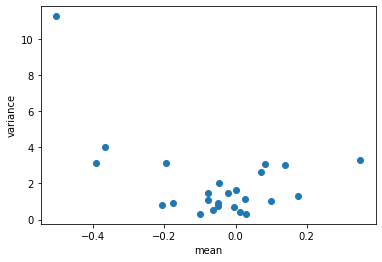

In [26]:
mean_variance_plot(table)

### Log transformation

In [27]:
log_table = table #np.log2(table)

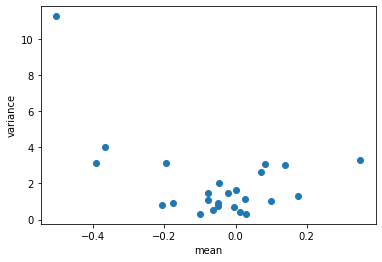

In [28]:
mean_variance_plot(log_table)

In [29]:
norm_log_table = log_table - np.mean(log_table)

In [30]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

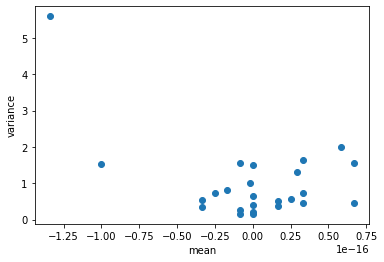

In [31]:
mean_variance_plot(norm_log_table)

### PCA

In [32]:
pca = decomposition.PCA(n_components=10)

In [33]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [34]:
pca.explained_variance_ratio_

array([0.25985115, 0.17298717, 0.13124761, 0.08898468, 0.08098517,
       0.0457469 , 0.03458083, 0.03187313, 0.02289903, 0.01975127])

In [35]:
components = pca.transform(norm_log_table)

In [36]:
components.shape

(212, 10)

In [37]:
sum(controls)

117

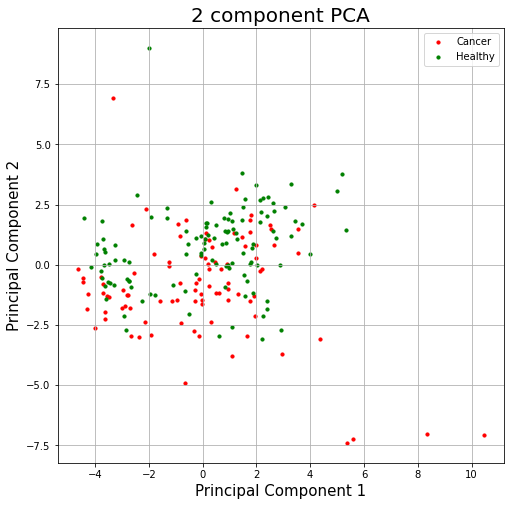

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [39]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

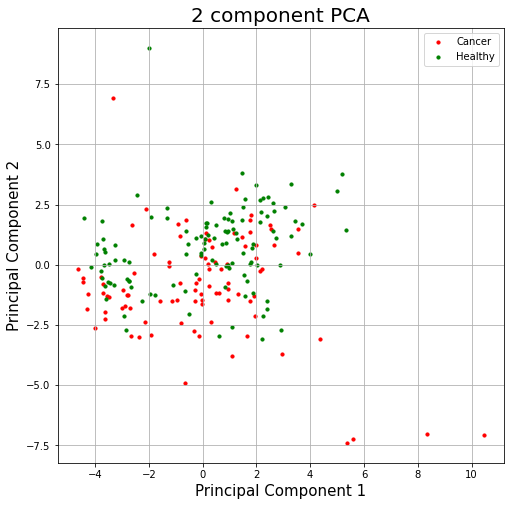

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [68]:
sex = data["GENDER"] == "F"
age = data["AGE"]
pack_years = data["PACK_YEARS"].replace("na", np.nan)

In [69]:
covars = pd.DataFrame(np.array([sex, age, pack_years]).transpose(), columns=["sex", "age", "pack years"])

In [77]:
covars["pack years"] = pd.to_numeric(covars["pack years"])

In [78]:
covars = covars.fillna(covars.mean())

In [79]:
covars.isna().sum()

sex           0
age           0
pack years    0
dtype: int64

In [80]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [81]:
adj_norm_log_table = norm_log_table - linreg.predict(covars)

# PCA

In [82]:
pca = decomposition.PCA(n_components=2)

In [83]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [84]:
components = pca.transform(adj_norm_log_table)

In [85]:
components

array([[-3.09220759e+00, -2.26586391e+00],
       [ 7.80775387e-01,  2.35543636e-01],
       [ 2.74131944e-01,  6.65889927e-01],
       [ 1.08582181e+00,  9.05746948e-01],
       [-4.19964955e+00,  6.22503993e-01],
       [ 1.90138398e+00,  2.84500408e-01],
       [ 1.36133510e+00, -1.60291035e+00],
       [ 8.48723484e-01, -3.68718989e-01],
       [-2.33860365e+00, -4.67622336e-01],
       [ 8.17548609e-01,  3.78082295e+00],
       [-2.10883242e+00, -9.53526879e-01],
       [ 1.05721286e+00, -7.58537666e-01],
       [ 2.86650293e+00,  1.50857942e+00],
       [-2.26411845e+00, -2.31221350e+00],
       [ 4.62718590e+00,  3.67635030e+00],
       [-5.38598915e-02,  8.44221315e-01],
       [-4.06969888e+00, -4.07535653e-01],
       [ 1.17511887e+00,  9.30517984e-01],
       [-3.85058983e+00, -3.05103292e-01],
       [ 5.35796276e+00,  1.12453665e+00],
       [-2.97603261e+00,  2.87007079e-01],
       [ 9.61790203e-01,  1.60202884e+00],
       [-2.62190133e+00, -1.30926918e+00],
       [ 7.

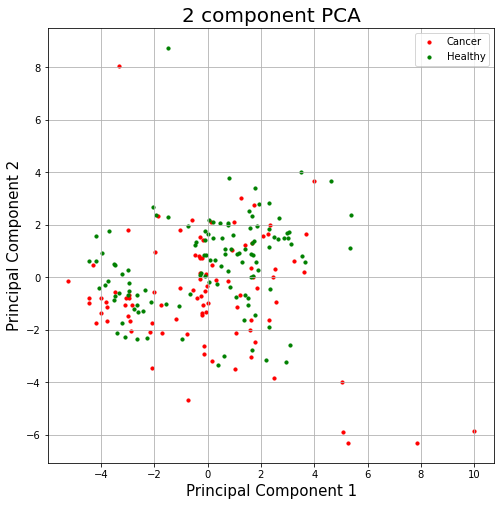

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [91]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [92]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


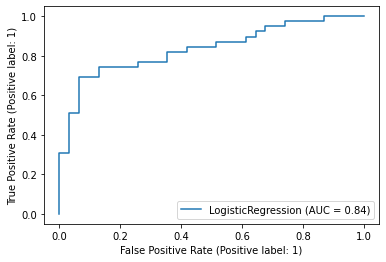

In [93]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [94]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[10:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


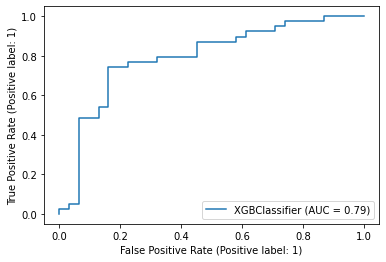

In [95]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [96]:
lookup_table_gpl = pd.read_csv("../Others/GPL8695.tsv", sep="\t")
lookup_table_gpl.head()

,ID,miRNA_ID,Part Number
0,hsa-miR-99b-4373007,hsa-miR-99b,4373007
1,hsa-miR-99a-4373008,hsa-miR-99a,4373008
2,hsa-miR-98-4373009,hsa-miR-98,4373009
3,hsa-miR-96-4373010,hsa-miR-96,4373010
4,hsa-miR-95-4373011,hsa-miR-95,4373011


In [97]:
from Scripts.converters import canonical_to_seq

In [98]:
mirbase_names = [c[:-8] for c in table.columns]

In [99]:
sequences = canonical_to_seq(mirbase_names)

In [100]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = sick
adj_norm_log_table.head()

,CCUAGGAAGAGGUAGUAGGUUGCAUAGUUUUAGGGCAGGGAUUUUGCCCACAAGGAGGUAACUAUACGACCUGCUGCCUUUCUUAGG,AGCAGCAUUGUACAGGGCUAUGA,UCGUACCGUGAGUAAUAAUGCG,UCUACAGUGCACGUGUCUCCAGU,CAGUGGUUUUACCCUAUGGUAG,UGUAGUGUUUCCUACUUUAUGGA,CAUAAAGUAGAAAGCACUACU,UCAGUGCACUACAGAACUUUGU,UCAGUGCAUCACAGAACUUUGU,CAAAGUGCUUACAGUGCAGGUAG,...,UGUAAACAUCCUACACUCAGCU,UGUAAACAUCCUACACUCUCAGC,UAUUGCACAUUACUAAGUUGCA,CUGGCCCUCUCUGCCCUUCCGU,GCCCCUGGGCCUAUCCUAGAA,UCUCACACAGAAAUCGCACCCGU,UUAUAAUACAACCUGAUAAGUG,AUCAUAGAGGAAAAUCCACGU,UCUUGGAGUAGGUCAUUGGGUGG,cancer
ID,,,,,,,,,,,,,,,,,,,,,
42,0.249444,-0.877524,-0.629899,-0.287636,0.288497,0.473081,0.199985,0.075390,-1.284068,-0.951493,...,0.266111,0.016548,0.604460,-0.497128,-0.072800,0.567907,0.465416,-3.467757,1.707112,False
43,0.376887,0.020484,0.706235,0.588852,-0.049592,-0.322094,-0.388929,-0.725147,-0.164460,0.331116,...,0.346207,0.107795,-0.454459,-0.208723,0.500939,-0.272122,0.671035,0.594452,1.288877,False
44,-0.262850,0.250894,-0.156822,1.189638,0.162327,-0.711435,-0.045879,-0.521766,-1.125644,0.178880,...,0.454477,0.233887,-0.970857,0.274988,0.077333,-1.463160,-0.524564,0.524922,-0.612233,False
45,-0.720558,0.304585,0.462181,1.317523,0.386950,-0.125731,-0.311142,0.234678,-1.679863,0.398978,...,0.341046,0.500441,-1.064783,0.439149,0.277574,0.284099,-0.157971,1.269548,0.430583,False
46,-0.549277,-0.616086,-0.799538,-0.240664,-0.626309,-0.318518,-0.511577,-0.632131,-0.824357,0.117579,...,-0.631907,0.162195,0.023577,-0.199892,-0.509569,0.064505,-1.868772,-3.372211,-1.371765,False


In [101]:
adj_norm_log_table.to_csv("../TransformedData/Bianchi2011_adjusted.csv", index=False)

In [105]:
mask = np.array([m in ["Lung Tumor", "Normal"] for m in data["CLASS"]])
clean_adj_norm_log_table = adj_norm_log_table.loc[mask]

In [106]:
clean_adj_norm_log_table.to_csv("../TransformedData/Bianchi2011_cleaned.csv", index=False)